In [311]:
from PIL import Image, ImageFilter
filename = 'cat.jpg'
with Image.open(filename) as img:
    img.load()
    
img_cat = img.crop((825, 235, 1675, 1200))
# img_cat = img_cat.resize((img_cat.width//2, img_cat.height//2))
# img_cat = img_cat.reduce(2)

def erode(erosions, img):
    for _ in range(erosions):
        img = img.filter(ImageFilter.MinFilter(3))
    return img


def dilate(dilations, img):
    for _ in range(dilations):
        img = img.filter(ImageFilter.MaxFilter(3))
    return img

In [312]:
img_cat_gray = img_cat.convert('L')
threshold = 100
img_cat_threshold = img_cat_gray.point(
  lambda x: 255 if x > threshold else 0
)

red, green, blue = img_cat.split()

zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge( "RGB", (red, zeroed_band, zeroed_band) )

green_merge = Image.merge( "RGB", (zeroed_band, green, zeroed_band) )

blue_merge = Image.merge( "RGB", (zeroed_band, zeroed_band, blue) )

threshold = 57
img_cat_threshold_blue = blue.point(lambda x: 255 if x > threshold else 0)
img_cat_threshold_blue = img_cat_threshold_blue.convert("1")

In [313]:
# display(img_cat)
# display(img_cat_gray)
# display(img_cat_threshold)

# display(red_merge); display(green_merge); display(blue_merge)

# display(red); display(green); display(blue)

# display(img_cat_threshold_blue)

In [314]:
step_1 = erode(17, img_cat_threshold)
step_2 = dilate(55, step_1)
cat_mask = erode(40, step_2)

In [315]:
# display(step_1)
# display(step_2)
# display(cat_mask)

In [326]:
# cat_mask = cat_mask.convert("L")
cat_mask_blurred = cat_mask.filter(ImageFilter.BoxBlur(20))

In [ ]:
# display(cat_mask_blurred)

In [328]:
blank = cat_mask_blurred.point(lambda _: 0)
cat_segmented = Image.composite(img_cat, blank, cat_mask)

In [ ]:
# display(cat_segmented)

In [341]:
filename_monastery = "monastery.jpg"
with Image.open(filename_monastery) as img_monastery:
    img_monastery.load()
    
img_monastery.paste(
    img_cat.resize((img_cat.width // 5, img_cat.height // 5)),
    (1300, 750),
    cat_mask.resize((cat_mask.width // 5, cat_mask.height // 5)),
)

In [344]:
# display(img_monastery)

In [369]:
logo = "realpython-logo.png"
with Image.open(logo) as img_logo:
    img_logo.load()
img_logo = img_logo.reduce(2).convert("L")

threshold = 50
img_logo = img_logo.point(lambda x: 255 if x > threshold else 0)
img_logo = img_logo.filter(ImageFilter.CONTOUR)
img_logo = img_logo.point(lambda x: 0 if x > threshold else 255) # 

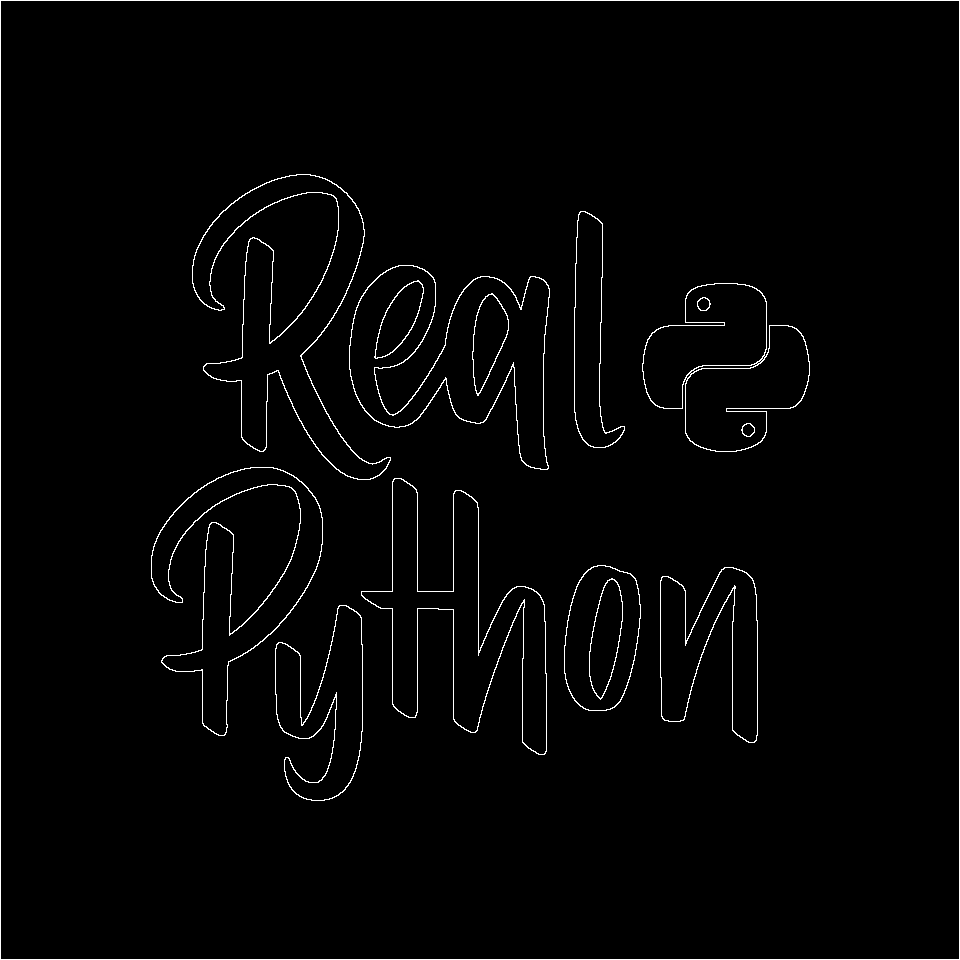

In [370]:
display(img_logo)